# **Diabetic Retinopathy Detection using Deep Learning (CNN)**

In this project, we explore the capabilities of **Convolutional Neural Networks (CNNs)** to detect **Diabetic Retinopathy (DR)** from retinal images. Diabetic Retinopathy is a diabetes-related eye disease that affects the blood vessels of the retina and can lead to blindness if left undiagnosed or untreated.

With the advent of deep learning, the diagnosis of such diseases has shifted toward the use of artificial intelligence, allowing for faster, more accurate, and more accessible medical assessments. This binary classification model is designed to distinguish between **two classes**:

1. **Class 0 (No Diabetic Retinopathy)**: Healthy retina images.
2. **Class 1 (Diabetic Retinopathy)**: Images indicating the presence of Diabetic Retinopathy.

The dataset used for this project is from [Kaggle: Diabetic Retinopathy 224x224 Gaussian Filtered](https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered/data). It contains retinal images that have been **preprocessed** with Gaussian filters, resized to 224x224 pixels, and labeled for binary classification.

<div style="text-align: center;">
    <img src="https://www.researchgate.net/publication/282609747/figure/fig2/AS:281548759814145@1444137863086/Difference-between-Normal-Retina-and-Diabetic-Retinopathy.png" alt="Image">
</div>

### Importing the necessary packages

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Loading and preprocessing the dataset

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory('diabetic_retinopathy_dataset/',target_size=(224, 224),
    batch_size=32,class_mode='binary',subset='training')

validation_generator = train_datagen.flow_from_directory('diabetic_retinopathy_dataset/',target_size=(224, 224),
    batch_size=32,class_mode='binary',subset='validation')

Found 2930 images belonging to 2 classes.
Found 732 images belonging to 2 classes.


### EDA - Exploratoy Data Analysis 

In [3]:
train_class_distribution = train_generator.class_indices
validation_class_distribution = validation_generator.class_indices

print(f"Training class distribution: {train_class_distribution}")
print(f"Validation class distribution: {validation_class_distribution}")

Training class distribution: {'DR': 0, 'No_DR': 1}
Validation class distribution: {'DR': 0, 'No_DR': 1}


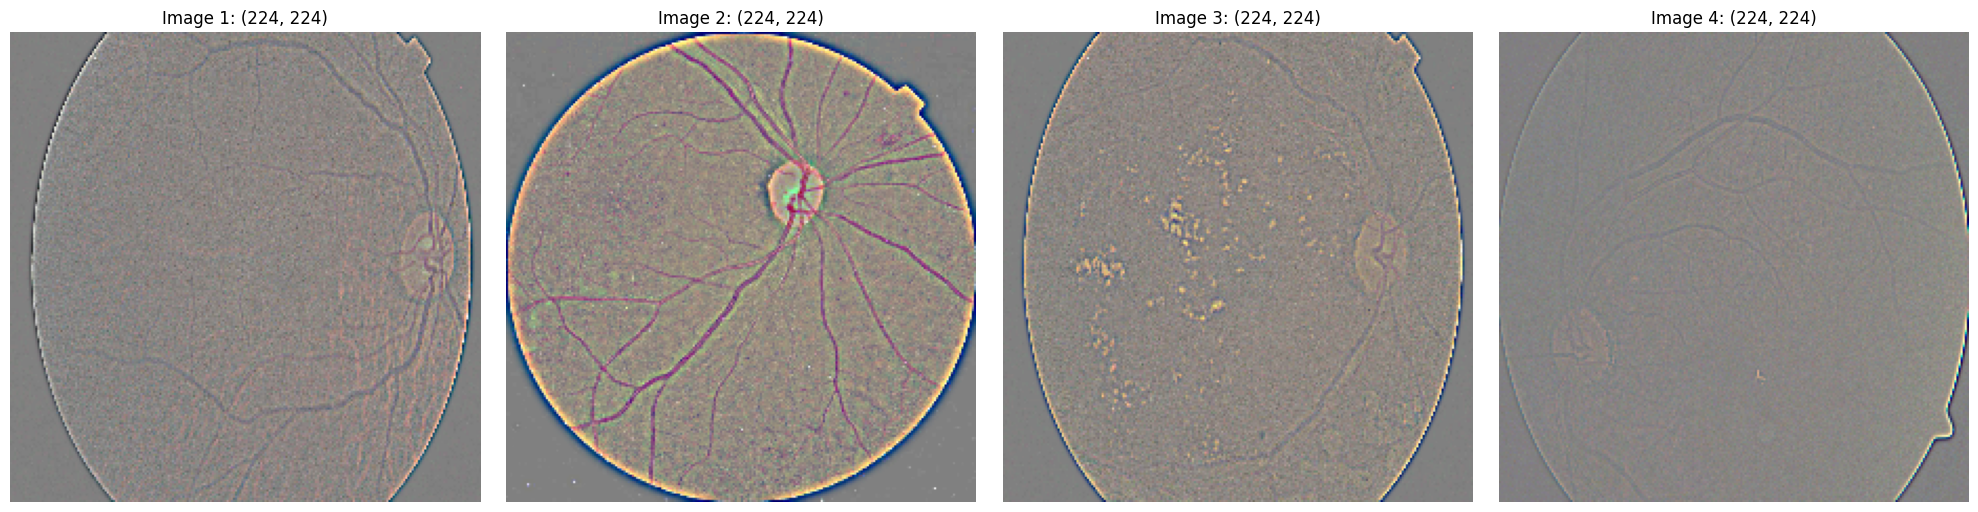

In [4]:
#the first 4 image and dimensions
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i in range(4):
    img_path = os.path.join(train_generator.directory, train_generator.filenames[i])
    img = image.load_img(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"Image {i+1}: {img.size}")
plt.tight_layout()
plt.show()

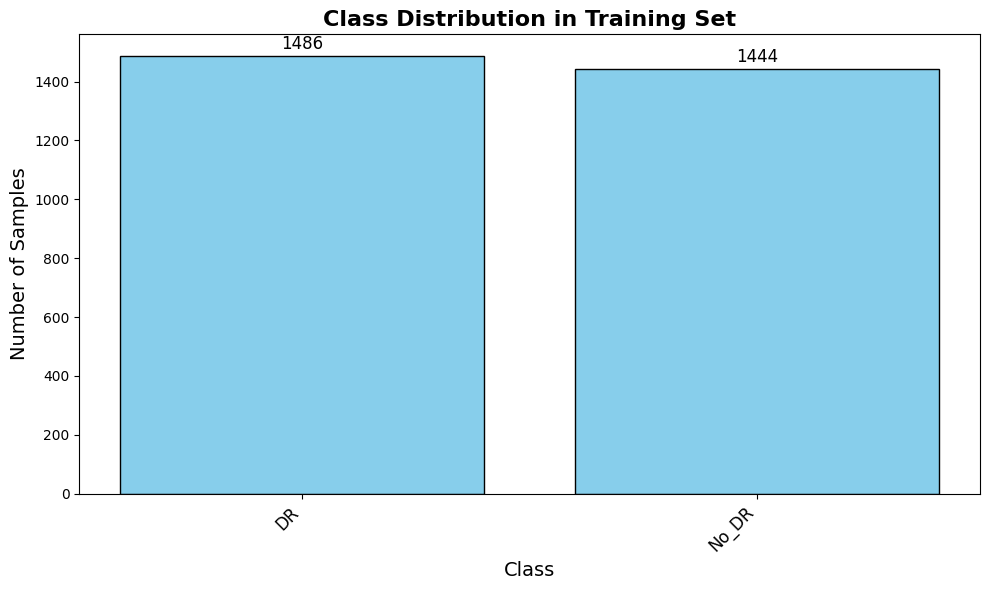

In [5]:
#class distribütion in training set
train_class_counts = [train_generator.labels.tolist().count(i) for i in range(len(train_class_distribution))]

plt.figure(figsize=(10, 6))
bars = plt.bar(train_class_distribution.keys(), train_class_counts, color='skyblue', edgecolor='black')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, 
             str(int(bar.get_height())), ha='center', va='bottom', fontsize=12)

plt.title('Class Distribution in Training Set', fontsize=16, fontweight='bold')
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

### Building CNN model

In [6]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(70, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

custom_cnn_model = cnn_model() #creating and training the custom CNN model
history=custom_cnn_model.fit(train_generator, validation_data=validation_generator, epochs=5)

Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 375ms/step - accuracy: 0.7220 - loss: 1.1474 - val_accuracy: 0.9085 - val_loss: 0.2019
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 370ms/step - accuracy: 0.9157 - loss: 0.2368 - val_accuracy: 0.9276 - val_loss: 0.1941
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 382ms/step - accuracy: 0.9230 - loss: 0.2178 - val_accuracy: 0.9440 - val_loss: 0.1819
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 376ms/step - accuracy: 0.9393 - loss: 0.1808 - val_accuracy: 0.9454 - val_loss: 0.1718
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 378ms/step - accuracy: 0.9494 - loss: 0.1634 - val_accuracy: 0.9372 - val_loss: 0.1740


In [7]:
sample_images, sample_labels = next(validation_generator) #making predictions on some sample data
predictions = custom_cnn_model.predict(sample_images)
predicted_labels = (predictions > 0.5).astype(int).reshape(-1)

print(f'True Labels: {sample_labels}') #comparing true and predicted labels
print(f'Predicted Labels: {predicted_labels}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
True Labels: [0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0.]
Predicted Labels: [0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0]


In [8]:
custom_cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 70)             │    13,063,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            71 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,249,641 (149.73 MB)

 Trainable params: 13,083,213 (49.91 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,166,428 (99.82 MB)

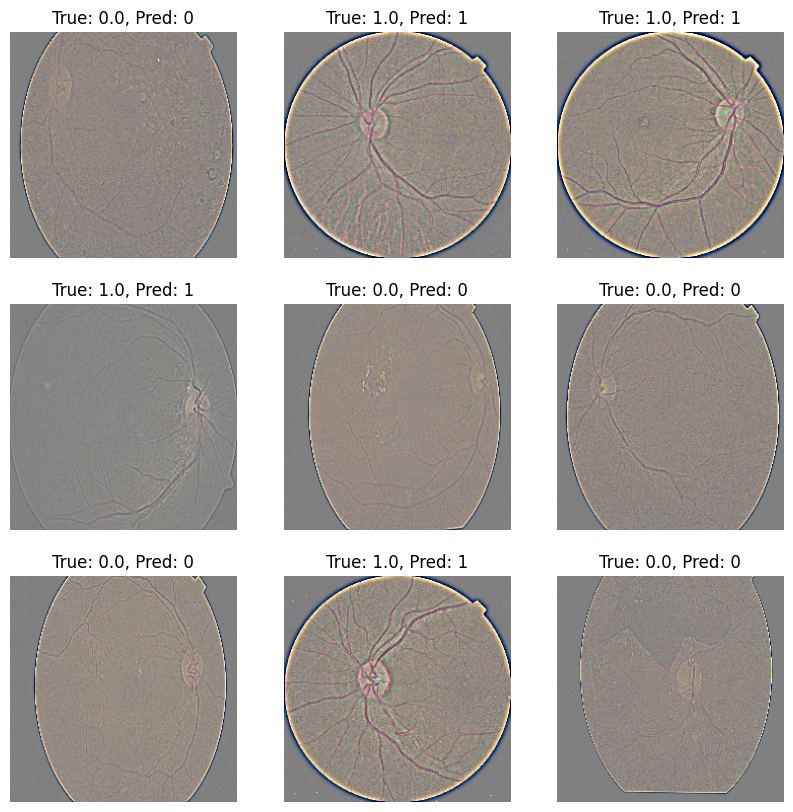

In [9]:
plt.figure(figsize=(10, 10)) #displaying sample images and their predictions
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    plt.title(f'True: {sample_labels[i]}, Pred: {predicted_labels[i]}')
    plt.axis('off')
plt.show()

In [10]:
y_true_classes = sample_labels
y_pred_classes = predicted_labels

cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))
print("Accuracy Score: ", accuracy_score(y_true_classes, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        19
         1.0       0.87      1.00      0.93        13

    accuracy                           0.94        32
   macro avg       0.93      0.95      0.94        32
weighted avg       0.95      0.94      0.94        32

Accuracy Score:  0.9375


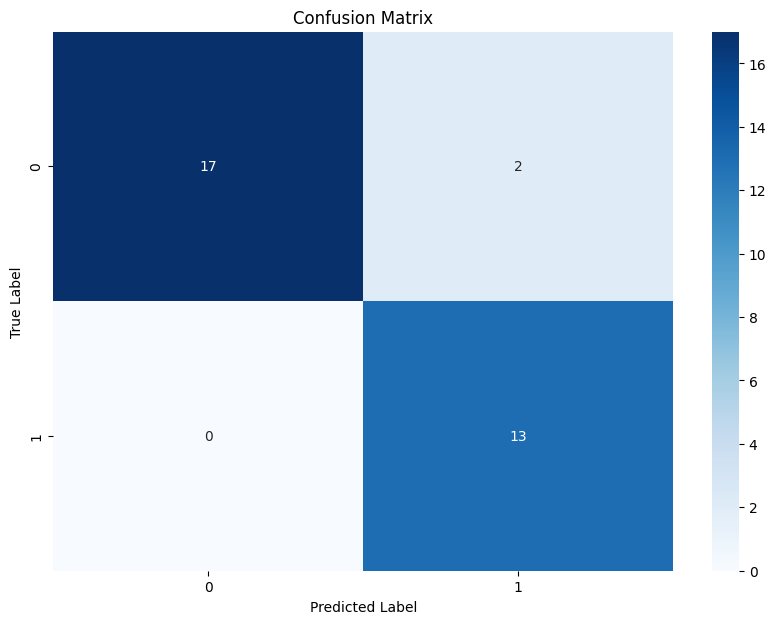

In [11]:
plt.figure(figsize=(10, 7)) #confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(2), yticklabels=np.arange(2))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

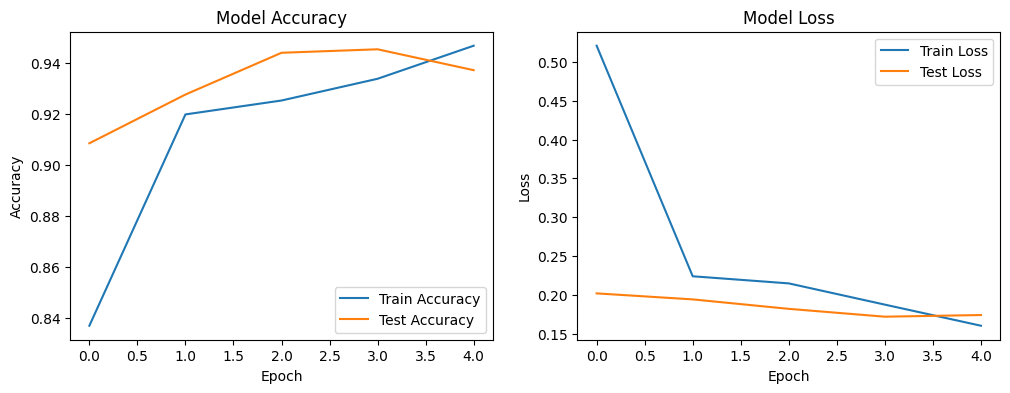

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1) #accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2) #loss graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Results and Evaluation

### Model Performance

The performance of the **Diabetic Retinopathy detection model** has been evaluated using standard classification metrics: **Precision**, **Recall**, **F1-Score**, and **Accuracy**. Below is the classification report generated from the model's predictions:

- **Accuracy**: 94%  
  The model achieves an overall accuracy of 94%, indicating that it correctly classifies most of the test images.

- **Precision**: 1.00 for class 0 (No DR) and 0.87 for class 1 (DR)  
  Precision indicates that when the model predicts an image as belonging to a class, it is highly likely to be correct. The model is perfect at predicting non-DR images (Class 0), with a precision of 1.00, but is slightly less precise when identifying DR images (Class 1) with a precision of 0.87.

- **Recall**: 0.89 for class 0 (No DR) and 1.00 for class 1 (DR)  
  Recall tells us how well the model identifies true positive cases. The model has a good recall of 0.89 for non-DR images, but it excels in detecting DR images, with a perfect recall of 1.00.

- **F1-Score**: 0.94 for class 0 (No DR) and 0.93 for class 1 (DR)  
  The F1-score is a balance between precision and recall. The model achieves a high F1-score of 0.94 for non-DR images, and 0.93 for DR images, indicating good performance overall.


### Model Insights

- The model is **highly effective** at identifying **healthy retina images** (class 0), with a perfect recall of 1.00, ensuring no false negatives for non-DR cases.
- While the **detection of Diabetic Retinopathy (class 1)** is also strong, there is a slight decrease in recall (0.90), meaning a small proportion of DR images were missed by the model.
- The overall **F1-score** demonstrates that the model maintains a good balance between precision and recall, making it suitable for scenarios where both false positives and false negatives must be minimized.
